In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 1. Randomly generate 100 numbers between 0 and 1 and save them to an array ’x’. These are your input values.
x = np.random.rand(100,1)

In [14]:
# 2. Create an array ’t’. For each entry x[i] in x, calculate x[i]**3-x[i]**2 
#    and save the results to t[i]. These are your targets.
t = pow(x,3) - pow(x,2) + 1

In [15]:
# class for one layer in a MLP
class Layer:
    def __init__(self, n_units, input_units):
        # The constructor should accept an integer argument n_units, indicating the number of units in the layer.
        self.n_units = n_units
        
        # The constructor should accept an integer argument ’input_units’,indicating the number of units in the preceding layer.
        self.input_units = input_units
        
        # The constructor should instantiate a bias vector and a weight matrixof shape (n inputs, n units).
        # Use random values for the weights andzeros for the biases. 
        self.bias_vector = np.zeros(n_units)
        self.weights = np.random.rand(input_units,n_units)
        
        # instantiate empty attributes for layer-input, layer preactivation and layer activation
        self.layer_input = 0
        self.layer_preactivation = 0
        self.layer_activation = 0
        
    # returns each unit’s activation(i.e. output) using ReLu as the activation function.
    def forward_step(self, layer_input):

        self.layer_input = layer_input
            
        self.layer_preactivation = np.matmul(self.layer_input, self.weights) + self.bias_vector
        self.layer_activation = np.maximum(0, self.layer_preactivation)
        return self.layer_activation
    
    def backward_step(self,next_layer_derivative):
        # heaviside is a step function -> derivative of ReLU
        preactivation_derivative = np.heaviside(self.layer_preactivation,0)
        
        # matmul is a matrix multiplication (not element wise)
        weight_gradient = np.matmul(np.transpose(self.layer_input), np.multiply(preactivation_derivative, next_layer_derivative))
        
        # gradients of the bias vector
        bias_gradient = np.multiply(preactivation_derivative, next_layer_derivative)
        
        # gradients of the inputs
        input_gradient = np.matmul(np.multiply(preactivation_derivative, next_layer_derivative),np.transpose(self.weights))
        
        # update parameters
        # rate 0.01 worked so much better then 0.04 -> it actually goes towards zero now
        rate = 0.01
        self.bias_vector = self.bias_vector - rate * bias_gradient
        self.weights = self.weights - rate * weight_gradient
        
        # return so the next layer can use it for it's calculations
        return input_gradient

In [16]:
# MLP class which combines instances of Layer class into a MLP
# takes a list of Layers: every entry is a layer wit the number of units as the value
class MLP:
    def __init__(self,structure):
        self.layers = list()
        for i in range(len(structure)):
            # first layer takes one input unit
            if (i == 0):
                self.layers.append(Layer(structure[i],1))
            # for the rest, the number of input units depends on the previous layer
            else:
                self.layers.append(Layer(structure[i],structure[i-1]))
    
    # pass input through network
    def forward_step(self, x):
        activation = x
        for layer in self.layers:
            activation = layer.forward_step(activation)
        return activation
    
    # just pass through the backwards_step of all layers starting at the last
    def backpropagation(self, loss):
        next_layer_derivative = loss
        for layer in reversed(self.layers):
            next_layer_derivative = layer.backward_step(next_layer_derivative)

In [17]:
# mean squared error function
def MSE(y,t):
    return 1/2 * (y - t) ** 2

# derivative of MSE to feed into the backpropagation
def MSE_derivative(y,t):
    return y-t

In [18]:
structure = [10,1]

# create MLP
mlp = MLP(structure)

# train MLP
epochs = 1000
loss = list()

# training

for i in range(epochs):
    # getting the output for every input
    output = mlp.forward_step(x)
    current_loss = MSE(output,t)
    loss.append(current_loss)
    # backpropagation
    mlp.backpropagation(MSE_derivative(output,t))

Text(0, 0.5, 'average loss')

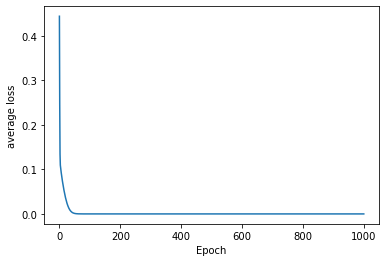

In [19]:
# visualization
# reduce Dimensionality to a single value per epoch

average_loss= np.mean(loss,1)

# plot the loss over all epochs
plt.plot(average_loss)
plt.xlabel("Epoch")
plt.ylabel("average loss")